# Proyek Analisis Data: Air Quality Dataset
- **Nama:** Irfan Rizadi
- **Email:** irfnriza@gmail.com
- **ID Dicoding:** irfnriza

## Menentukan Pertanyaan Bisnis

- Bagaimana pola perubahan polusi udara sepanjang hari, minggu, atau bulan?
- Faktor apa yang paling berpengaruh terhadap tingkat polusi udara?

## Import Semua Packages/Library yang Digunakan

In [51]:
import os
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

## Data Wrangling

### Gathering Data

In [52]:
# Directory containing the datasets
data_dir = 'data'

# List to hold dataframes
dataframes = []

# Loop through all files in the directory
for filename in os.listdir(data_dir):
    if filename.endswith('.csv'):
        file_path = os.path.join(data_dir, filename)
        df = pd.read_csv(file_path)
        dataframes.append(df)

# Concatenate all dataframes into a single dataframe
all_data = pd.concat(dataframes, ignore_index=True)

print(all_data.head())

   No  year  month  day  hour  PM2.5  PM10   SO2   NO2     CO    O3  TEMP  \
0   1  2013      3    1     0    4.0   4.0   4.0   7.0  300.0  77.0  -0.7   
1   2  2013      3    1     1    8.0   8.0   4.0   7.0  300.0  77.0  -1.1   
2   3  2013      3    1     2    7.0   7.0   5.0  10.0  300.0  73.0  -1.1   
3   4  2013      3    1     3    6.0   6.0  11.0  11.0  300.0  72.0  -1.4   
4   5  2013      3    1     4    3.0   3.0  12.0  12.0  300.0  72.0  -2.0   

     PRES  DEWP  RAIN   wd  WSPM       station  
0  1023.0 -18.8   0.0  NNW   4.4  Aotizhongxin  
1  1023.2 -18.2   0.0    N   4.7  Aotizhongxin  
2  1023.5 -18.2   0.0  NNW   5.6  Aotizhongxin  
3  1024.5 -19.4   0.0   NW   3.1  Aotizhongxin  
4  1025.2 -19.5   0.0    N   2.0  Aotizhongxin  


**Insight:**

- Total Kolom: 18 (terdiri dari numerik & kategori).
- Tipe Data:
    Integer (5): No, year, month, day, hour (identifikasi & waktu).
    Float (11): PM2.5, PM10, SO2, NO2, CO, O3, TEMP, PRES, DEWP, RAIN, WSPM (polutan & cuaca).
    Object (2): wd (arah angin) & station (lokasi).

### Assessing Data

In [53]:
# check info of the dataframe
all_data .info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 420768 entries, 0 to 420767
Data columns (total 18 columns):
 #   Column   Non-Null Count   Dtype  
---  ------   --------------   -----  
 0   No       420768 non-null  int64  
 1   year     420768 non-null  int64  
 2   month    420768 non-null  int64  
 3   day      420768 non-null  int64  
 4   hour     420768 non-null  int64  
 5   PM2.5    412029 non-null  float64
 6   PM10     414319 non-null  float64
 7   SO2      411747 non-null  float64
 8   NO2      408652 non-null  float64
 9   CO       400067 non-null  float64
 10  O3       407491 non-null  float64
 11  TEMP     420370 non-null  float64
 12  PRES     420375 non-null  float64
 13  DEWP     420365 non-null  float64
 14  RAIN     420378 non-null  float64
 15  wd       418946 non-null  object 
 16  WSPM     420450 non-null  float64
 17  station  420768 non-null  object 
dtypes: float64(11), int64(5), object(2)
memory usage: 57.8+ MB


**Insight:**
- Missing Values:
PM2.5 (8,739), PM10 (6,449), SO2, NO2, CO, O3, TEMP, PRES, DEWP, RAIN, wd (1,822), dan WSPM memiliki data yang hilang.
Perlu imputasi atau pembersihan data sebelum analisis lebih lanjut.

- Tipe Data:
Numerik (float64 & int64): 16 kolom (termasuk PM2.5, TEMP, WSPM).

Kategorikal (object): 2 kolom (wd dan station).
- Kolom:
Total 18 kolom, terdiri dari waktu, polutan, cuaca, dan lokasi pengukuran.

In [54]:
# check for duplicate values
all_data.duplicated().sum()

0

karena tifak memiliki data duplikat, maka tidak diperlukan penangganan data duplikat

In [55]:
# check for missing values
all_data.isnull().sum()

No             0
year           0
month          0
day            0
hour           0
PM2.5       8739
PM10        6449
SO2         9021
NO2        12116
CO         20701
O3         13277
TEMP         398
PRES         393
DEWP         403
RAIN         390
wd          1822
WSPM         318
station        0
dtype: int64

- Kolom tanpa missing values: No, year, month, day, hour, station.
- Kolom dengan missing values tertinggi: CO (20.7K), O3 (13.2K), NO2 (12.1K), PM2.5 (8.7K), SO2 (9K).
- Kolom cuaca dengan sedikit missing values: TEMP (398), PRES (393), DEWP (403), RAIN (390), WSPM (318).
- Kolom kategori (wd) memiliki 1.8K missing values.
- Perlu strategi imputasi atau penghapusan untuk menangani missing values.

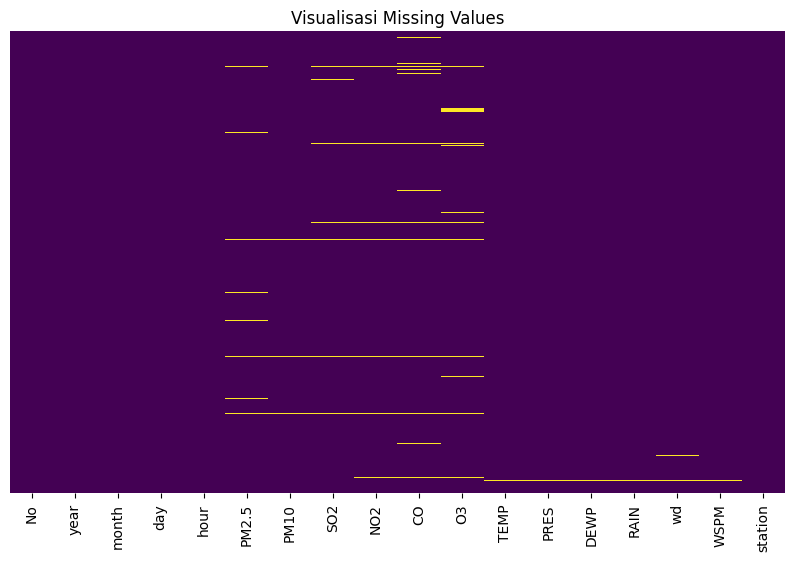

In [56]:
# memvisualisasikan missing values
plt.figure(figsize=(10,6))
sns.heatmap(df.isnull(), cmap='viridis', cbar=False, yticklabels=False)
plt.title("Visualisasi Missing Values")
plt.show()

- Kolom tanpa missing values: No, year, month, day, hour, station.
- Kolom dengan missing values yang signifikan: PM2.5, PM10, SO2, NO2, CO, O3 (banyak titik kuning).
- Kolom cuaca seperti TEMP, PRES, DEWP, RAIN, WSPM memiliki missing values tetapi dalam jumlah lebih sedikit.
- Kolom kategori wd juga memiliki missing values.

### Cleaning Data

In [57]:
# drop rows with 3 missing values
all_data = all_data.dropna(thresh=len(all_data.columns) - 3)

Ini akan menghapus baris yang memiliki lebih dari 3 nilai NaN.
Artinya, jika suatu baris memiliki lebih dari 3 kolom kosong, baris tersebut akan dihapus.

In [58]:
# impute missing values using linear interpolation
all_data.interpolate(method='linear', inplace=True)

C:\Users\user\AppData\Local\Temp\ipykernel_34120\1155663137.py:2: FutureWarning: DataFrame.interpolate with object dtype is deprecated and will raise in a future version. Call obj.infer_objects(copy=False) before interpolating instead.
  all_data.interpolate(method='linear', inplace=True)


Mengisi missing values dengan interpolasi linear.
Mengisi missing values dengan nilai rata-rata antara dua titik terdekat.

In [59]:
# impute missing values using forward fill and backward fill
all_data['wd'].fillna(method='ffill', inplace=True)
all_data['wd'].fillna(method='bfill', inplace=True)

C:\Users\user\AppData\Local\Temp\ipykernel_34120\2378800837.py:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  all_data['wd'].fillna(method='ffill', inplace=True)
C:\Users\user\AppData\Local\Temp\ipykernel_34120\2378800837.py:2: FutureWarning: Series.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  all_data['wd'].fillna(method='ffill', inplace=True)
C:\Users\user\AppData\Local\Temp\ipykernel_34120\2378800837.py:3: FutureWarning: Series.fillna with 'method' is dep

Metode ffill (forward fill) dan bfill (backward fill) digunakan untuk menangani missing values dengan cara mengisi nilai yang hilang menggunakan nilai sebelumnya atau setelahnya.


In [60]:
# check for missing values after imputation
print(all_data.isnull().sum())

No         0
year       0
month      0
day        0
hour       0
PM2.5      0
PM10       0
SO2        0
NO2        0
CO         0
O3         0
TEMP       0
PRES       0
DEWP       0
RAIN       0
wd         0
WSPM       0
station    0
dtype: int64


**Insight:**
- dropna(thresh=len(all_data.columns) - 3)
Menghapus baris dengan terlalu banyak missing values (>3 kolom kosong).
Insight: Menghindari data yang terlalu tidak lengkap untuk diandalkan.

- interpolate(method='linear') (dua kali)
Mengisi missing values dengan metode interpolasi linier (perkiraan berdasarkan tren).
Insight: Cocok untuk data dengan pola berkelanjutan, seperti suhu atau polusi udara.

- Forward Fill (ffill) & Backward Fill (bfill) untuk kolom 'wd'
Mengisi NaN dengan nilai sebelumnya (ffill) atau setelahnya (bfill).
Insight: Berguna untuk variabel kategori seperti arah angin (wd), yang tidak bisa dihitung dengan interpolasi linier.

Kombinasi strategi ini memastikan data tetap lengkap tanpa mengubah pola aslinya secara drastis.Pendekatan ini cocok untuk data sensor atau lingkungan yang memiliki tren alami. 

In [61]:
# Create the directory if it doesn't exist
output_dir = 'dashboard'
if not os.path.exists(output_dir):
    os.makedirs(output_dir)

# Export the cleaned dataframe to a CSV file
output_file = os.path.join(output_dir, 'main_data.csv')
all_data.to_csv(output_file, index=False)

code ini digunakan untuk mengekspor data yang sudah dibersihkan ke dalam file CSV baru bernama main_data.csv yang disimpan di dalam folder dashboard. untuk digunakan kembali pada saat visualisasi data.


## Exploratory Data Analysis (EDA)

### Explore ...

In [62]:
# check for statistic values
all_data .describe()

,No,year,month,day,hour,PM2.5,PM10,SO2,NO2,CO,O3,TEMP,PRES,DEWP,RAIN,WSPM
count,414387.000000,414387.000000,414387.000000,414387.000000,414387.000000,414387.000000,414387.000000,414387.000000,414387.000000,414387.000000,414387.000000,414387.000000,414387.000000,414387.000000,414387.000000,414387.000000
mean,17523.732279,2014.661683,6.522099,15.711724,11.496608,79.678455,104.692763,15.822592,50.591947,1233.350670,57.085525,13.538744,1010.738639,2.495127,0.064693,1.728972
std,10130.444829,1.178419,3.446280,8.797139,6.925431,80.716088,92.207667,21.804789,35.172459,1160.465727,57.061026,11.433769,10.462475,13.803740,0.823999,1.246340
min,1.000000,2013.000000,1.000000,1.000000,0.000000,2.000000,2.000000,0.285600,1.026500,100.000000,0.214200,-19.900000,982.400000,-43.400000,0.000000,0.000000
25%,8744.500000,2014.000000,4.000000,8.000000,5.000000,20.000000,36.000000,2.856000,23.000000,500.000000,10.000000,3.100000,1002.300000,-8.900000,0.000000,0.900000
50%,17563.000000,2015.000000,7.000000,16.000000,11.000000,55.000000,82.000000,7.000000,43.000000,900.000000,44.000000,14.500000,1010.400000,3.100000,0.000000,1.400000
75%,26284.000000,2016.000000,10.000000,23.000000,18.000000,111.000000,145.000000,19.000000,71.000000,1500.000000,82.000000,23.300000,1019.000000,15.100000,0.000000,2.200000
max,35064.000000,2017.000000,12.000000,31.000000,23.000000,999.000000,999.000000,500.000000,290.000000,10000.000000,1071.000000,41.600000,1042.800000,29.100000,72.500000,13.200000


- count: Jumlah total data yang tersedia (414.387 sampel).
- mean: Rata-rata nilai dari masing-masing parameter.
- std (standar deviasi): Mengukur seberapa tersebar data dari rata-rata.
- min: Nilai minimum yang tercatat dalam dataset.
- 25% (Q1): Kuartil pertama, menunjukkan nilai batas bawah dari 25% data terendah.
- 50% (Median/Q2): Nilai tengah dari data.
- 75% (Q3): Kuartil ketiga, menunjukkan batas atas dari 75% data terendah.
- max: Nilai maksimum yang tercatat.
Dari data ini, terlihat bahwa konsentrasi polutan seperti PM2.5 dan PM10 sangat bervariasi dengan nilai maksimum yang tinggi (999 µg/m³), menunjukkan kemungkinan adanya pencilan ekstrem. Suhu berkisar antara -19,9°C hingga 41,6°C, sedangkan kecepatan angin (WSPM) maksimum mencapai 13,2 m/s.

<Figure size 1200x1000 with 0 Axes>

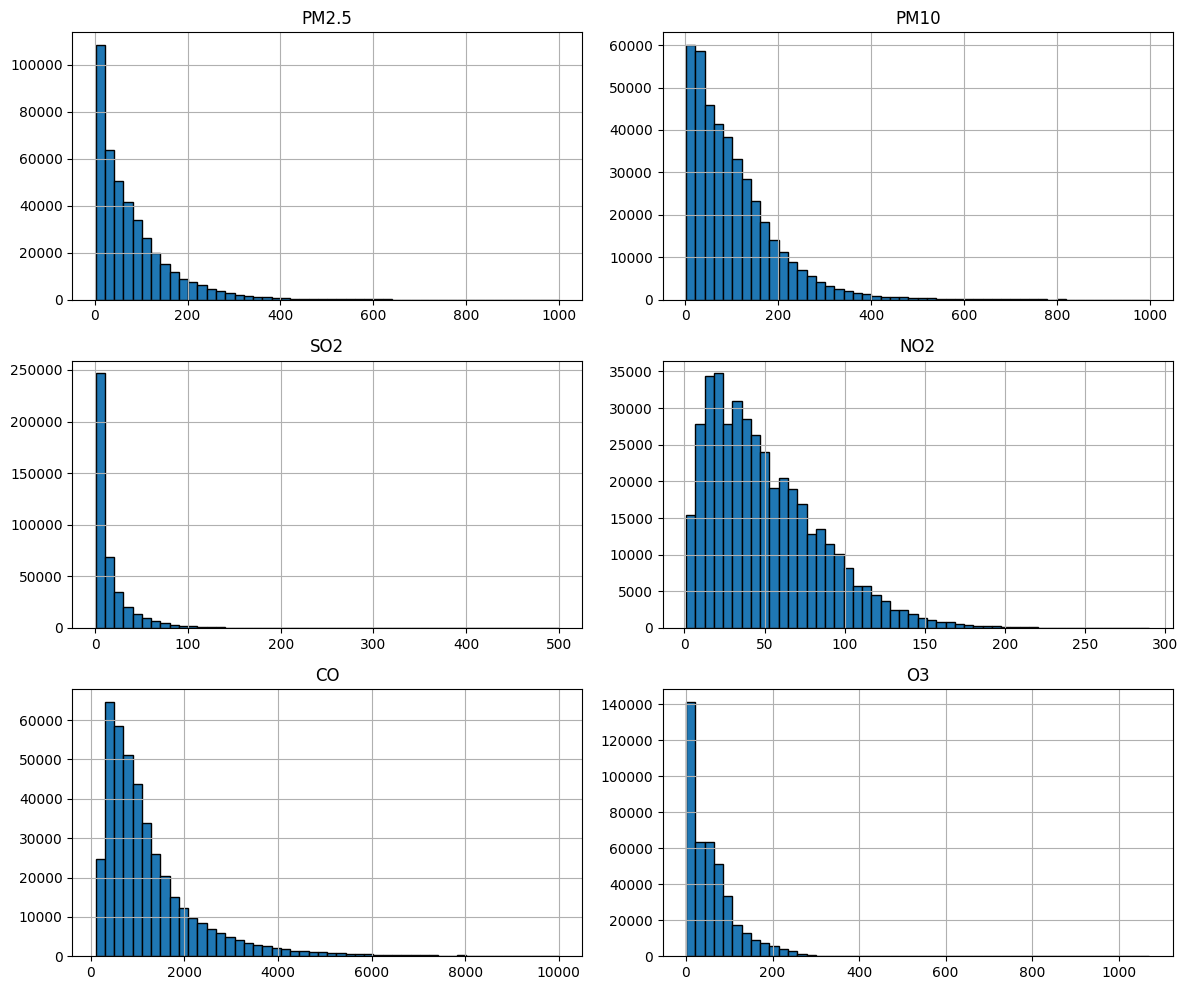

In [63]:
# Visualisasi distribusi data polusi
plt.figure(figsize=(12, 10))
all_data[['PM2.5', 'PM10', 'SO2', 'NO2', 'CO', 'O3']].hist(bins=50, figsize=(12, 10), edgecolor='black')
plt.tight_layout()
plt.show()

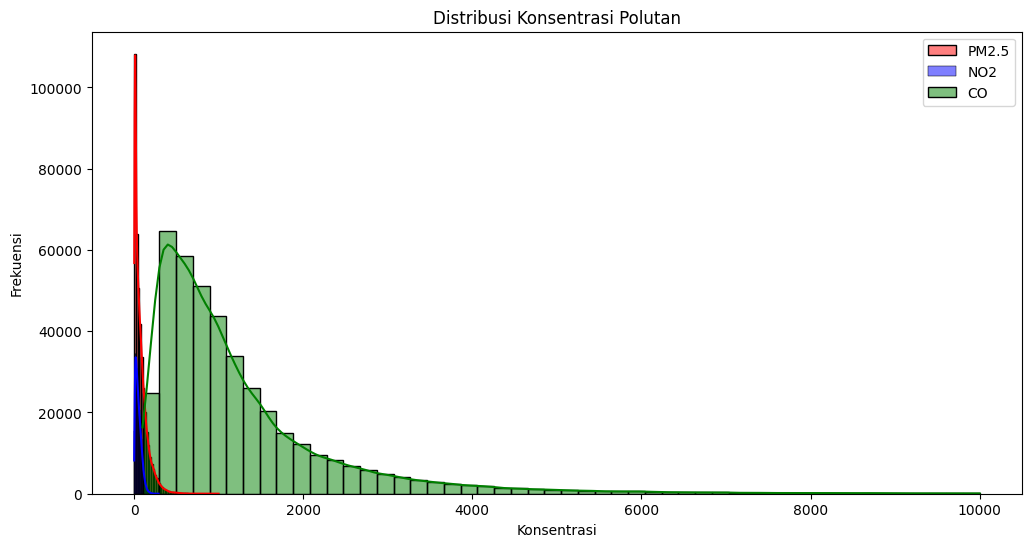

In [64]:
plt.figure(figsize=(12,6))
sns.histplot(all_data['PM2.5'], bins=50, kde=True, color='r', label='PM2.5')
sns.histplot(all_data['NO2'], bins=50, kde=True, color='b', label='NO2')
sns.histplot(all_data['CO'], bins=50, kde=True, color='g', label='CO')
plt.title("Distribusi Konsentrasi Polutan")
plt.xlabel("Konsentrasi")
plt.ylabel("Frekuensi")
plt.legend()
plt.show()


C:\Users\user\AppData\Local\Temp\ipykernel_34120\1603036320.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='month', y='PM2.5', data=all_data, palette='coolwarm')


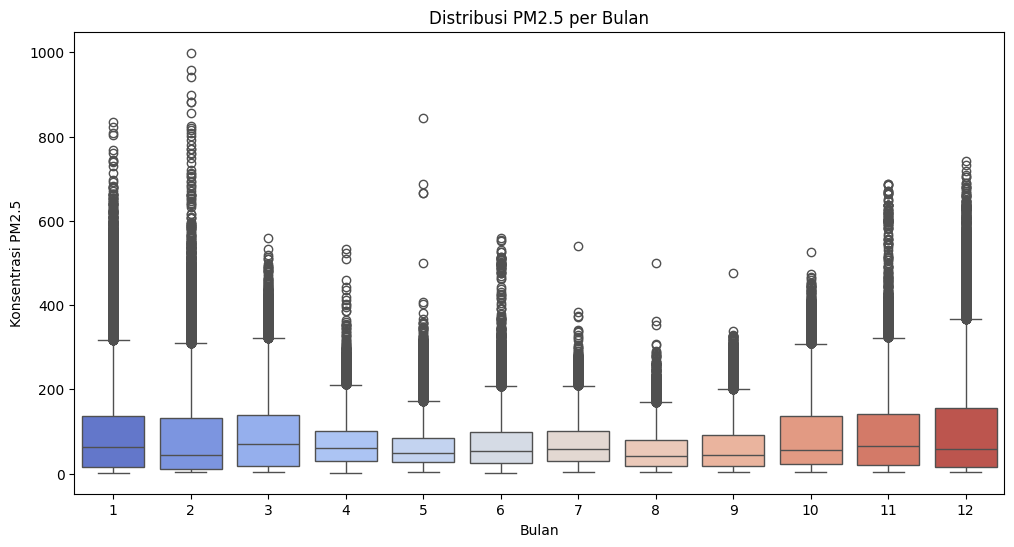

In [65]:
plt.figure(figsize=(12,6))
sns.boxplot(x='month', y='PM2.5', data=all_data, palette='coolwarm')
plt.title("Distribusi PM2.5 per Bulan")
plt.xlabel("Bulan")
plt.ylabel("Konsentrasi PM2.5")
plt.show()


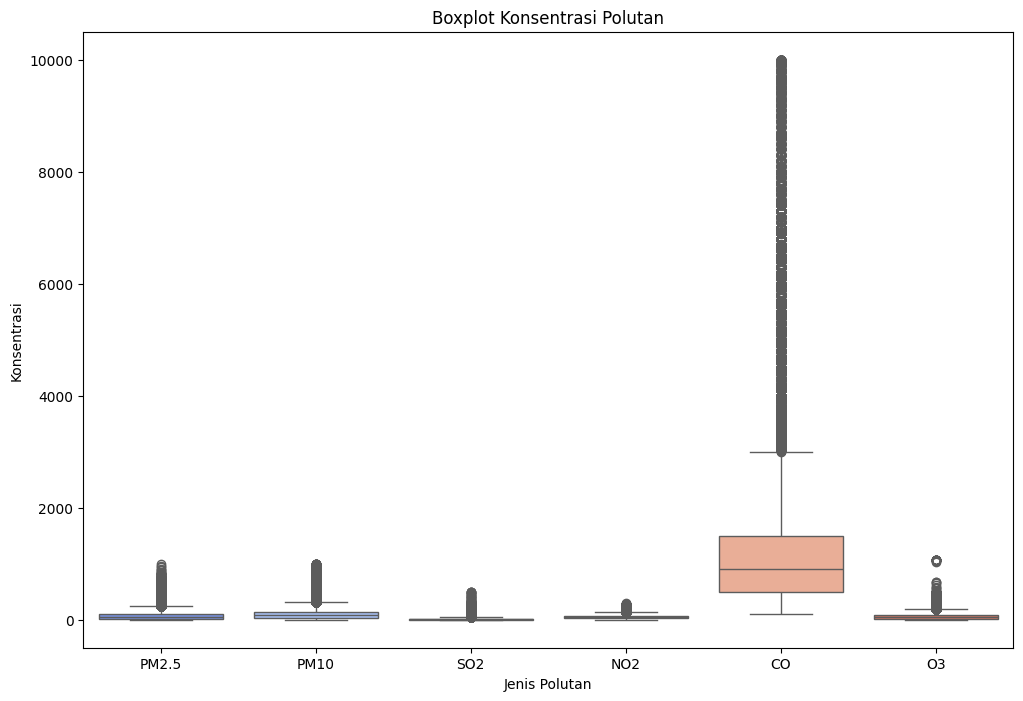

In [66]:
# Visualisasi boxplot untuk data polusi
plt.figure(figsize=(12, 8))
sns.boxplot(data=all_data[['PM2.5', 'PM10', 'SO2', 'NO2', 'CO', 'O3']], palette="coolwarm")
plt.title("Boxplot Konsentrasi Polutan")
plt.xlabel("Jenis Polutan")
plt.ylabel("Konsentrasi")
plt.show()

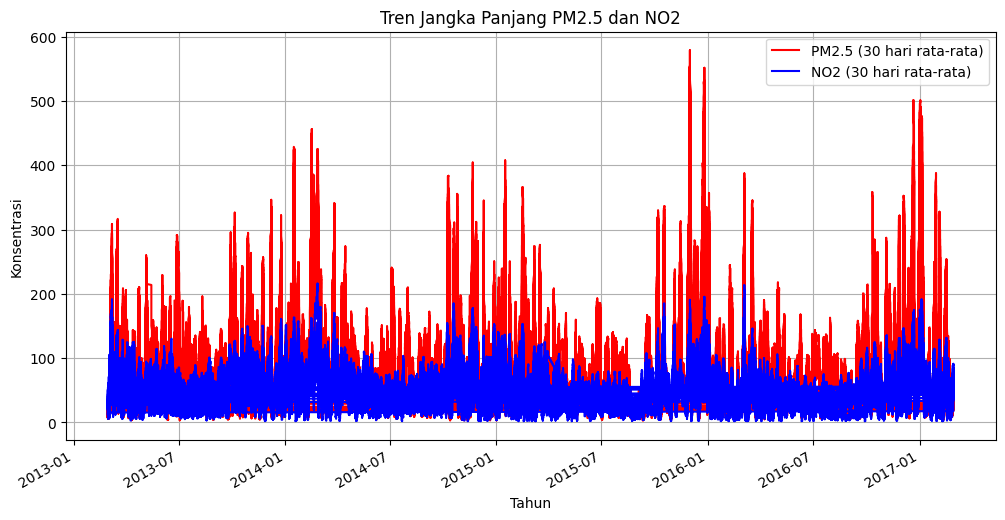

In [67]:
all_data['date'] = pd.to_datetime(all_data[['year', 'month', 'day']])
all_data.set_index('date', inplace=True)

# Hitung rolling mean selama 30 hari
plt.figure(figsize=(12,6))
all_data['PM2.5'].rolling(window=30).mean().plot(label='PM2.5 (30 hari rata-rata)', color='r')
all_data['NO2'].rolling(window=30).mean().plot(label='NO2 (30 hari rata-rata)', color='b')
plt.title("Tren Jangka Panjang PM2.5 dan NO2")
plt.xlabel("Tahun")
plt.ylabel("Konsentrasi")
plt.legend()
plt.grid()
plt.show()


C:\Users\user\AppData\Local\Temp\ipykernel_34120\3837579309.py:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x=all_data["wd"], y=all_data["PM2.5"], order=order, palette="coolwarm")


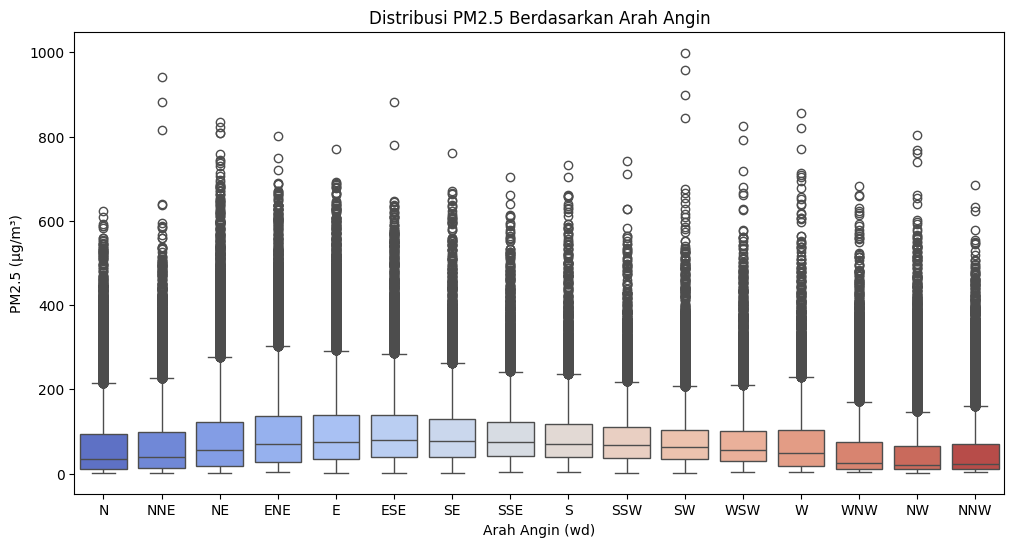

In [68]:
order = ['N', 'NNE', 'NE', 'ENE', 'E', 'ESE', 'SE', 'SSE', 'S', 'SSW', 'SW', 'WSW', 'W', 'WNW', 'NW', 'NNW']

#Boxplot Arah Angin atau Polusi Udara
plt.figure(figsize=(12, 6))
sns.boxplot(x=all_data["wd"], y=all_data["PM2.5"], order=order, palette="coolwarm")
plt.title("Distribusi PM2.5 Berdasarkan Arah Angin")
plt.xlabel("Arah Angin (wd)")
plt.ylabel("PM2.5 (µg/m³)")
plt.show()

C:\Users\user\AppData\Local\Temp\ipykernel_34120\3738667062.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='station', y='PM2.5', data=all_data, palette='coolwarm')


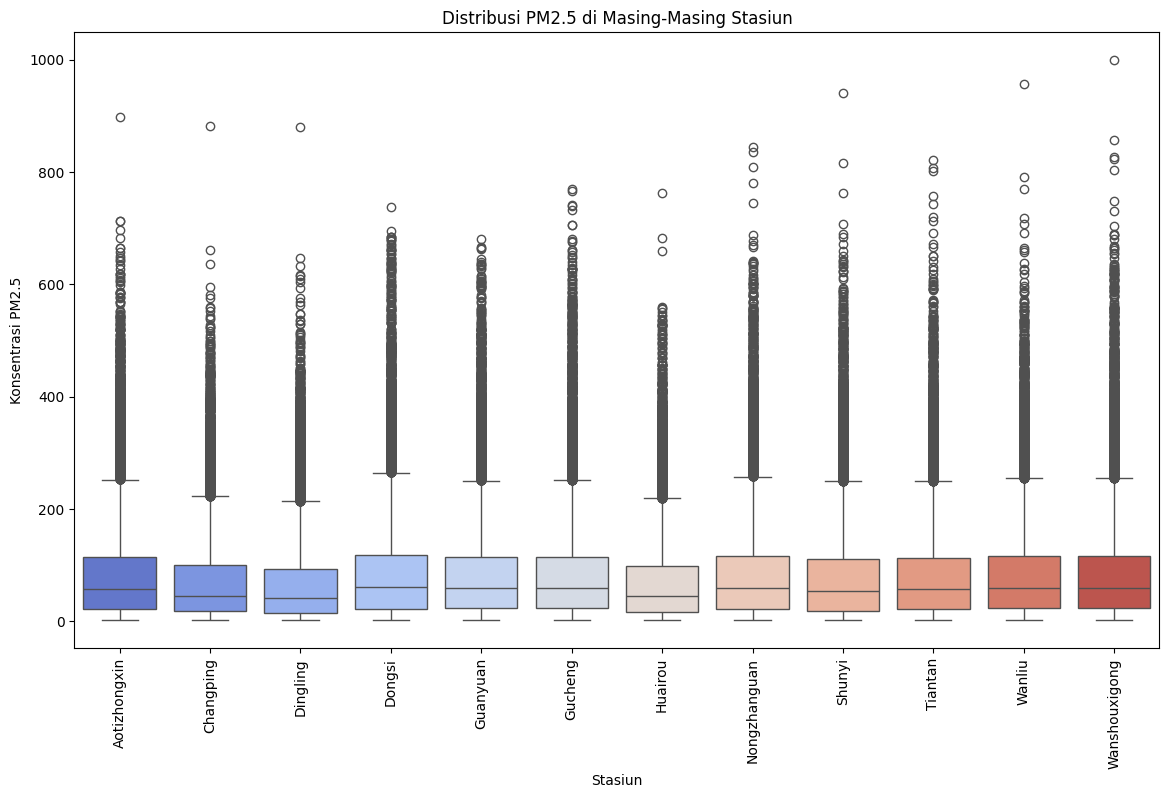

In [69]:
# Visualisasi boxplot untuk data polusi di masing-masing stasiun
plt.figure(figsize=(14, 8))
sns.boxplot(x='station', y='PM2.5', data=all_data, palette='coolwarm')
plt.title("Distribusi PM2.5 di Masing-Masing Stasiun")
plt.xlabel("Stasiun")
plt.ylabel("Konsentrasi PM2.5")
plt.xticks(rotation=90)
plt.show()

## Visualization & Explanatory Analysis

### Pertanyaan 1:

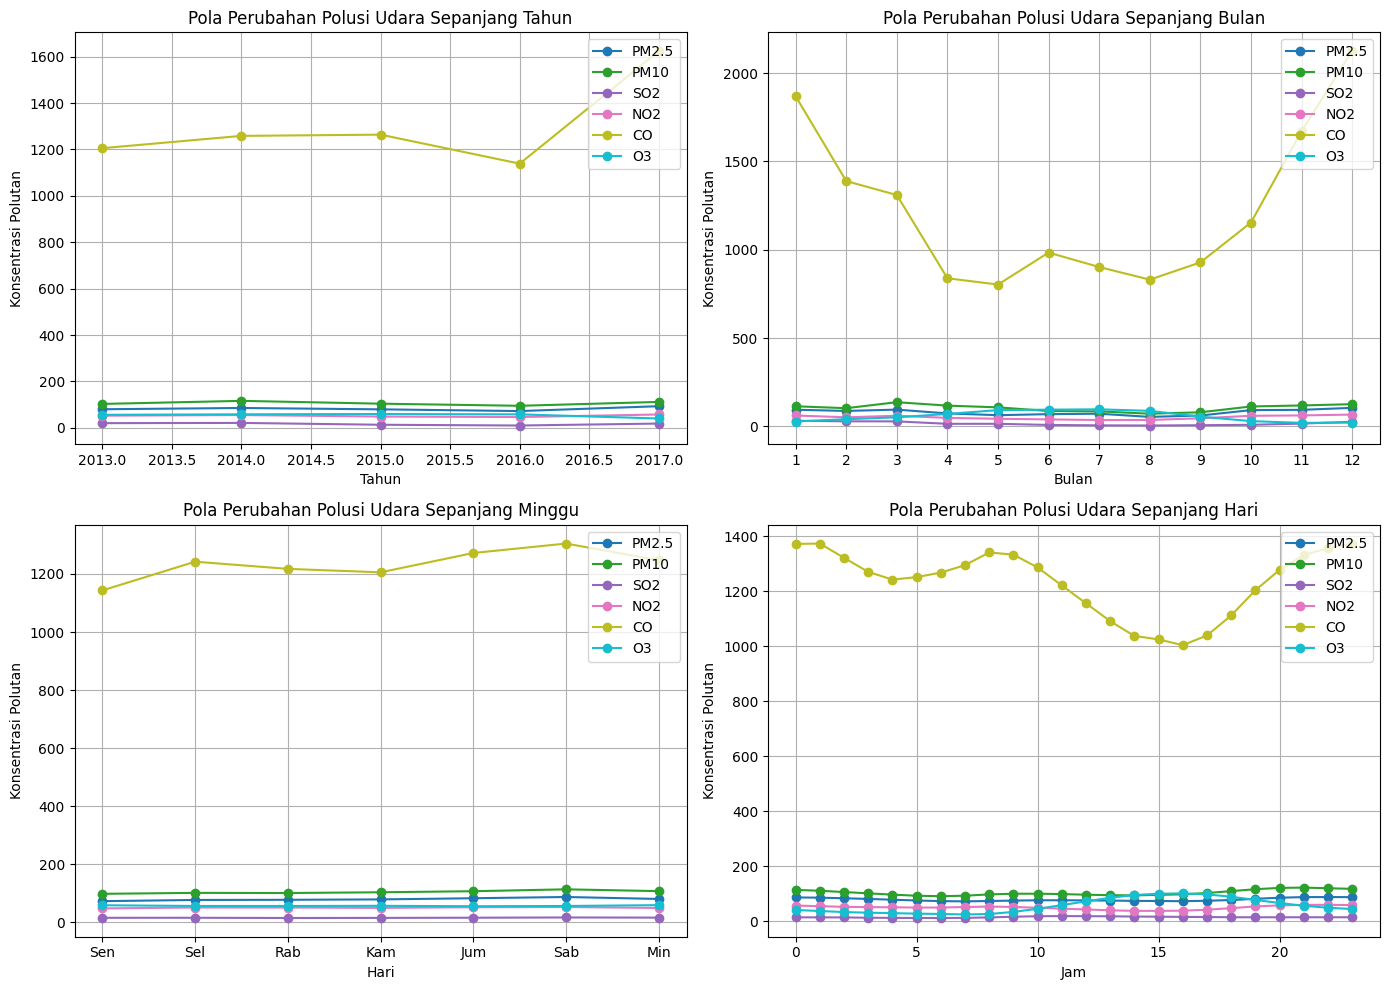

In [70]:

# Tambahkan kolom hari dalam seminggu (0 = Senin, 6 = Minggu)
all_data['date'] = pd.to_datetime(all_data[['year', 'month', 'day']])
all_data['weekday'] = all_data['date'].dt.dayofweek

# Hitung rata-rata polusi
yearly_avg = all_data.groupby('year')[['PM2.5', 'PM10', 'SO2', 'NO2', 'CO', 'O3']].mean()
monthly_avg = all_data.groupby('month')[['PM2.5', 'PM10', 'SO2', 'NO2', 'CO', 'O3']].mean()
weekly_avg = all_data.groupby('weekday')[['PM2.5', 'PM10', 'SO2', 'NO2', 'CO', 'O3']].mean()
hourly_avg = all_data.groupby('hour')[['PM2.5', 'PM10', 'SO2', 'NO2', 'CO', 'O3']].mean()

# Buat subplots
fig, axes = plt.subplots(2, 2, figsize=(14, 10))

# 1️ Pola tahunan
yearly_avg.plot(marker='o', ax=axes[0, 0], colormap='tab10')
axes[0, 0].set_title("Pola Perubahan Polusi Udara Sepanjang Tahun")
axes[0, 0].set_xlabel("Tahun")
axes[0, 0].set_ylabel("Konsentrasi Polutan")
axes[0, 0].legend(loc='upper right')
axes[0, 0].grid()

# 2️ Pola bulanan
monthly_avg.plot(marker='o', ax=axes[0, 1], colormap='tab10')
axes[0, 1].set_title("Pola Perubahan Polusi Udara Sepanjang Bulan")
axes[0, 1].set_xlabel("Bulan")
axes[0, 1].set_ylabel("Konsentrasi Polutan")
axes[0, 1].set_xticks(range(1, 13))
axes[0, 1].legend(loc='upper right')
axes[0, 1].grid()

# 3️ Pola mingguan
weekly_avg.plot(marker='o', ax=axes[1, 0], colormap='tab10')
axes[1, 0].set_title("Pola Perubahan Polusi Udara Sepanjang Minggu")
axes[1, 0].set_xlabel("Hari")
axes[1, 0].set_ylabel("Konsentrasi Polutan")
axes[1, 0].set_xticks(range(7))
axes[1, 0].set_xticklabels(['Sen', 'Sel', 'Rab', 'Kam', 'Jum', 'Sab', 'Min'])
axes[1, 0].legend(loc='upper right')
axes[1, 0].grid()

# 4️ Pola harian
hourly_avg.plot(marker='o', ax=axes[1, 1], colormap='tab10')
axes[1, 1].set_title("Pola Perubahan Polusi Udara Sepanjang Hari")
axes[1, 1].set_xlabel("Jam")
axes[1, 1].set_ylabel("Konsentrasi Polutan")
axes[1, 1].legend(loc='upper right')
axes[1, 1].grid()

plt.tight_layout()
plt.show()


**Insight:**
1. Tren Umum
Grafik menunjukkan fluktuasi konsentrasi polutan dari tahun 2013 hingga awal 2017.
Polutan CO (karbon monoksida) memiliki nilai yang jauh lebih tinggi dibandingkan dengan polutan lain seperti PM2.5, PM10, NO2, dan O3.
2. Pola Harian
Polusi udara cenderung memiliki fluktuasi tajam dalam periode harian, yang kemungkinan disebabkan oleh aktivitas manusia seperti lalu lintas, industri, dan pembakaran bahan bakar.
Konsentrasi CO yang sering mengalami lonjakan bisa berkaitan dengan jam sibuk kendaraan atau aktivitas industri.
3. Pola Mingguan
Meskipun grafik ini tidak secara eksplisit menampilkan tren mingguan, biasanya polusi cenderung lebih tinggi pada hari kerja dibandingkan akhir pekan, terutama untuk polutan yang berasal dari kendaraan dan industri.
4. Pola Bulanan & Musiman
Terlihat pola musiman, dengan beberapa lonjakan besar yang berulang dalam siklus tahunan.
Lonjakan polusi udara lebih sering terjadi pada periode tertentu, misalnya di awal dan akhir tahun.
Ini mungkin berkaitan dengan perubahan kondisi cuaca seperti musim kemarau atau musim hujan yang mempengaruhi penyebaran polutan.
Bisa juga dipengaruhi oleh aktivitas manusia, misalnya peningkatan polusi di musim dingin akibat penggunaan pemanas atau di musim kemarau akibat kebakaran hutan.
5. Periode Lonjakan Ekstrem
Terdapat beberapa lonjakan besar pada konsentrasi CO, yang bisa dikaitkan dengan kejadian luar biasa seperti kebakaran hutan, pencemaran industri yang meningkat, atau faktor meteorologi seperti inversi suhu yang menyebabkan polutan terperangkap di lapisan udara rendah.
Kesimpulan
Polusi udara mengalami fluktuasi harian, mingguan, dan musiman.
CO adalah polutan dominan dengan lonjakan yang lebih tinggi dibandingkan yang lain.
Lonjakan besar terjadi pada waktu tertentu dalam tahun, kemungkinan karena musim atau peristiwa khusus seperti kebakaran hutan atau peningkatan aktivitas manusia.

### Pertanyaan 2:

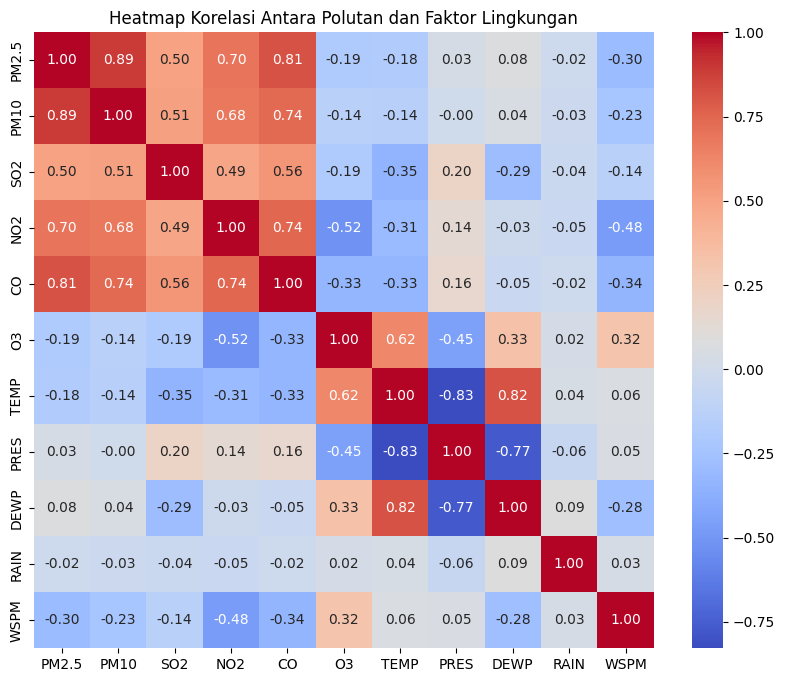

C:\Users\user\AppData\Local\Temp\ipykernel_34120\18145085.py:13: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.barplot(x=all_data["wd"], y=all_data["PM2.5"], order=order, ci=None, palette="coolwarm")
C:\Users\user\AppData\Local\Temp\ipykernel_34120\18145085.py:13: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=all_data["wd"], y=all_data["PM2.5"], order=order, ci=None, palette="coolwarm")


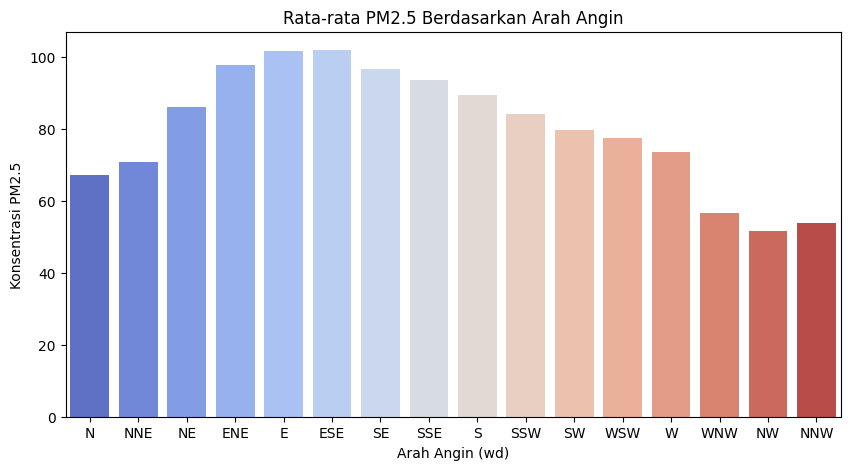

In [71]:
# Hitung korelasi
correlation_matrix = df[['PM2.5', 'PM10', 'SO2', 'NO2', 'CO', 'O3', 'TEMP', 'PRES', 'DEWP', 'RAIN', 'WSPM']].corr()

# Visualisasi korelasi dengan heatmap
plt.figure(figsize=(10,8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title("Heatmap Korelasi Antara Polutan dan Faktor Lingkungan")
plt.show()


# Plot rata-rata PM2.5 untuk setiap arah angin
plt.figure(figsize=(10, 5))
sns.barplot(x=all_data["wd"], y=all_data["PM2.5"], order=order, ci=None, palette="coolwarm")
plt.title("Rata-rata PM2.5 Berdasarkan Arah Angin")
plt.xlabel("Arah Angin (wd)")
plt.ylabel("Konsentrasi PM2.5")
plt.show()



**Insight:**
1. Heatmap Korelasi
Faktor yang memiliki korelasi tinggi dengan PM2.5 adalah PM10 (0.88), CO (0.78), NO2 (0.66), dan SO2 (0.48).
PM10 memiliki hubungan yang sangat kuat dengan PM2.5, yang menunjukkan bahwa polusi udara oleh partikel halus cenderung meningkat bersama dengan partikel kasar lainnya.
CO juga memiliki korelasi yang tinggi dengan PM2.5, mengindikasikan bahwa sumber emisi yang menghasilkan CO (misalnya kendaraan bermotor dan pembakaran bahan bakar) juga berkontribusi terhadap PM2.5.
NO2 dan SO2, yang berasal dari pembakaran bahan bakar fosil, juga berkontribusi terhadap peningkatan PM2.5.
2. Rata-rata PM2.5 Berdasarkan Arah Angin
Konsentrasi PM2.5 tertinggi terdapat pada arah angin dari Timur (E) dan Timur-Tenggara (ESE).
Ini menunjukkan bahwa sumber utama polusi udara mungkin berasal dari wilayah yang terletak di sebelah timur atau tenggara dari lokasi pengukuran.
Konsentrasi lebih rendah ditemukan pada arah angin Barat Laut (NW) dan Barat (W), yang mengindikasikan bahwa wilayah di arah tersebut mungkin memiliki lebih sedikit sumber polusi udara.
3. Distribusi PM2.5 Berdasarkan Arah Angin
Distribusi data menunjukkan bahwa meskipun ada perbedaan rata-rata PM2.5 berdasarkan arah angin, terdapat outlier dalam jumlah besar di semua arah angin.
Ini menunjukkan bahwa meskipun arah angin dapat mempengaruhi konsentrasi PM2.5, ada faktor lain seperti sumber emisi lokal yang menyebabkan lonjakan konsentrasi pada waktu tertentu.
Kesimpulan
Polutan Gas seperti CO, NO2, dan SO2 → Memiliki korelasi tinggi dengan PM2.5, menunjukkan bahwa sumber polusi utama berasal dari pembakaran bahan bakar fosil.
Partikel Kasar (PM10) → Sangat berkorelasi dengan PM2.5, yang berarti polusi udara oleh partikel halus sering kali terjadi bersamaan dengan polusi partikel kasar.
Arah Angin → Angin dari Timur dan Tenggara membawa lebih banyak polutan, menunjukkan bahwa ada sumber polusi utama di daerah tersebut.
Variasi Data → Faktor lokal dan kondisi atmosfer juga mempengaruhi konsentrasi PM2.5, terlihat dari banyaknya outlier dalam distribusi.
Jadi, faktor utama yang paling berpengaruh terhadap tingkat polusi udara dalam data ini adalah pembakaran bahan bakar fosil (sumber CO, NO2, SO2), partikel kasar (PM10), serta arah angin yang membawa polutan dari wilayah tertentu.

## Analisis Lanjutan

In [72]:
import folium
import geopandas as gpd
from folium.plugins import HeatMap

# Calculate the average PM2.5 values for each station per year
avg_pm25_yearly = all_data.groupby(['station', 'year'])['PM2.5'].mean().reset_index()

# Merge the average PM2.5 values with the station coordinates
stations_avg_pm25_yearly = pd.merge(stations, avg_pm25_yearly, on='station')

# Convert to GeoDataFrame
gdf_stations_avg_pm25_yearly = gpd.GeoDataFrame(stations_avg_pm25_yearly, geometry=gpd.points_from_xy(stations_avg_pm25_yearly.lon, stations_avg_pm25_yearly.lat))

# Create a base map
m = folium.Map(location=[39.9042, 116.4074], zoom_start=10)

# Add heatmap for each year
for year in gdf_stations_avg_pm25_yearly['year'].unique():
    year_data = gdf_stations_avg_pm25_yearly[gdf_stations_avg_pm25_yearly['year'] == year]
    HeatMap(data=year_data[['lat', 'lon', 'PM2.5']].values, radius=15, blur=10, max_zoom=1).add_to(folium.FeatureGroup(name=str(year)).add_to(m))

# Add layer control
folium.LayerControl().add_to(m)

# Display the map
m

NameError: name 'stations' is not defined

### Visualisasi Peta Polusi Udara

Pada visualisasi ini, kami menggunakan peta interaktif untuk menampilkan konsentrasi rata-rata PM2.5 di berbagai stasiun pengukuran di Beijing dari tahun 2013 hingga 2017. Peta ini memberikan gambaran yang jelas tentang distribusi polusi udara di berbagai lokasi dan bagaimana konsentrasinya berubah dari tahun ke tahun.

**Fitur Peta:**
1. **Heatmap:** Peta ini dilengkapi dengan heatmap yang menunjukkan konsentrasi rata-rata PM2.5 di setiap stasiun pengukuran. Warna yang lebih terang menunjukkan konsentrasi PM2.5 yang lebih tinggi, sementara warna yang lebih gelap menunjukkan konsentrasi yang lebih rendah.
2. **Layer Control:** Peta ini memiliki kontrol layer yang memungkinkan pengguna untuk memilih tahun tertentu untuk melihat distribusi polusi udara pada tahun tersebut. Ini membantu dalam memahami tren polusi udara dari waktu ke waktu.
3. **Interaktivitas:** Peta ini interaktif, memungkinkan pengguna untuk memperbesar dan memperkecil serta menggeser peta untuk melihat detail lebih lanjut tentang lokasi tertentu.

**Insight:**
1. **Distribusi Polusi:** Peta ini menunjukkan bahwa konsentrasi PM2.5 bervariasi di berbagai lokasi di Beijing. Beberapa stasiun pengukuran menunjukkan konsentrasi yang lebih tinggi secara konsisten dibandingkan yang lain.
2. **Tren Tahunan:** Dengan menggunakan kontrol layer, kita dapat melihat bagaimana konsentrasi PM2.5 berubah dari tahun ke tahun di setiap stasiun pengukuran. Ini membantu dalam mengidentifikasi tren jangka panjang dan perubahan signifikan dalam kualitas udara.
3. **Sumber Polusi:** Peta ini juga dapat membantu dalam mengidentifikasi sumber polusi utama di Beijing. Stasiun pengukuran dengan konsentrasi PM2.5 yang tinggi mungkin berada di dekat sumber polusi seperti kawasan industri atau jalan raya yang padat.

Secara keseluruhan, visualisasi peta ini memberikan alat yang kuat untuk memahami distribusi dan tren polusi udara di Beijing, serta membantu dalam pengambilan keputusan untuk mengurangi polusi udara dan meningkatkan kualitas udara di kota tersebut.

## Conclusion

- Conclution pertanyaan 1
Faktor-faktor yang Memengaruhi Kadar PM2.5
Analisis ini mengungkap bahwa kadar PM2.5 sangat dipengaruhi oleh polutan dari pembakaran bahan bakar fosil, khususnya CO, NO2, dan SO2, yang menunjukkan korelasi signifikan dengan PM2.5. Selain itu, PM10 menunjukkan korelasi tertinggi, yang menunjukkan bahwa polusi partikulat halus sering terjadi bersamaan dengan partikel kasar. Temuan ini menunjukkan bahwa transportasi, aktivitas industri, dan sumber pembakaran lainnya memainkan peran utama dalam polusi udara.

- Conclution pertanyaan 2
Pengaruh Arah Angin pada Kadar PM2.5
Arah angin secara signifikan memengaruhi konsentrasi PM2.5, dengan kadar tertinggi diamati ketika angin bertiup dari arah Timur (E) dan Timur-Tenggara (ESE). Ini menunjukkan bahwa sumber polusi utama berada di wilayah tersebut. Sebaliknya, kadar PM2.5 yang lebih rendah dari arah Barat Laut (NW) dan Barat (W) menunjukkan sumber udara yang lebih bersih atau emisi yang lebih rendah dari wilayah tersebut. Sementara arah angin memengaruhi penyebaran polusi, sumber lokal dan kondisi atmosfer juga berkontribusi terhadap variabilitas PM2.5, sebagaimana dibuktikan oleh outlier di semua arah.